# <center>__Assignment 3__</center>

In [35]:
"""load required packages"""

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, zero_one_loss, classification_report, confusion_matrix,\
                            precision_score, recall_score, f1_score, plot_roc_curve, plot_confusion_matrix

## __Question 1__

For a presidential election, campaign organizers for both the Republican and Democrat parties are interested in identifying undecided voters who would consider voting for their party. The file BlueOrRed.csv (provided on canvas) contains data on a sample of voters with tracked variables including: whether or not they are undecided regarding their candidate preference, age, whether they own a home, gender, marital status, household size, income, years of education, and whether they attend church. For this dataset, you would use the Undecided variable as your output variable and the rest of the variables as your input variables. You want to predict whether a candidate is undecided(Undecided=1) or decided(Undecided=0). 

### a) Upload the data into Python and check for missing data. If there is any missing data, drop the cases that have the missing data. 

In [2]:
"""load data into Python and check for missing records"""

blue_or_red = pd.read_csv('Blueorred.csv')
blue_or_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            10000 non-null  int64  
 1   HomeOwner      10000 non-null  int64  
 2   Female         10000 non-null  int64  
 3   Married        10000 non-null  int64  
 4   HouseholdSize  10000 non-null  int64  
 5   Income         10000 non-null  float64
 6   Education      10000 non-null  int64  
 7   Church         10000 non-null  int64  
 8   Undecided      10000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 703.2 KB


### b)	 Normalize the continuous variables using min-max normalization. You should obtain a new dataset that has your normalized continuous input variables, the categorical input variables (the categorical input variables are fine and don’t need to be normalized), and your output variable.

In [3]:
"""
apply  min-max normalization to the data and assign to a new variable
blue_or_red_norm
"""

# make a list of continuous variables
continuous_idx = ['Age', 'HouseholdSize', 'Income', 'Education']
# make a copy  of the original dataset
blue_or_red_norm = blue_or_red.copy()
# instantiate sklearn MinMaxScaler, fit and transform data
scaler = MinMaxScaler()
blue_or_red_norm[continuous_idx] = scaler.fit_transform(blue_or_red_norm[continuous_idx])
blue_or_red_norm.head()

,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Church,Undecided
0,0.523810,1,1,1,0.500000,0.306422,0.583333,0,1
1,0.444444,1,1,1,0.833333,0.763303,0.583333,1,0
2,0.587302,1,0,1,0.833333,0.234862,0.666667,0,1
3,0.507937,1,0,1,0.500000,0.025688,0.000000,0,0
4,0.492063,1,1,1,0.166667,0.113761,0.583333,1,1


### c)	Why do you think using min-max normalization is a better choice for this situation compared to using other scalers such as the Standard Scaler which standardizes the data?

When continuous variables are not measured at the same scale they do not contribute equally during model fitting. This can create a biased model. This is especially true in the case of classification decision trees where splits at each leaf node are determined by measuring which attribute best separates the data. Using the scikit-learn MinMaxScaler will scale the data so that each continuous attribute value will fall between 0 and 1 irregardless of the original scale.

### d)	Use the train_test_split() function in the sklearn.model_selection module in scikit-learn to split the data into training and test sets. Your test set should be 30% of the entire data. Print the shape of the X_train, y_train, X_test and y_test data. You can use the default value of the random state in splitting the data, which is random_state=42. 

In [4]:
"""split the data into training and test sets"""

# separate features and target
X = blue_or_red_norm.iloc[:, :-1]
y = blue_or_red_norm.iloc[:, -1:]
# create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30,
                                                    random_state=42)

### e)	Construct a decision tree and fit the tree into the data. Then use your decision tree model to make predictions on the training set as well as on the test set. Assign your results to y_train_pred and y_test_pred respectively. Print out the first 100 predictions for each of the  y_train_pred and y_test_pred. 

In [5]:
"""construct the decision tree classifier and fit ti the training data"""

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [6]:
"""make predictions on the training set and print the first 100 predictions"""

y_train_pred = dtc.predict(X_train)
y_train_pred[0:100]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1])

In [7]:
"""make predictions on the test set and print the first 100 predictions"""

y_test_pred = dtc.predict(X_test)
y_test_pred[0:100]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

### f)	Find the overall accuracy of the tree model on the training set and on the test set. Use the accuracy_score() function in the sklearn.metrics module. Does the tree overfit the model? Why or why not?  

In [8]:
"""print accuracy score for predictions made on the training set"""

print(accuracy_score(y_train, y_train_pred))

1.0


In [9]:
"""print accuracy score for predictions made on the test set"""

print(accuracy_score(y_test, y_test_pred))

0.9666666666666667


The decision tree does not appear to overfit the model. A predcition accuracy of 100% on the training set is unusual and is normally a sign of oveerfitting, but when considering an accuracy on the test set of approximately 97% its clear the model performed almost equally well on unseen data.

### g)	Also, use the .score() method of the tree estimator to find the overall accuracy on the training set and test set. 

In [10]:
"""use the tree estimator .score() method to print accuracy of predictions on the trainig set"""

print(dtc.score(X_train, y_train))

1.0


In [11]:
"""use the tree estimator .score() method to print the accuraccy of predictions on the test set"""

print(dtc.score(X_test, y_test))

0.9666666666666667


### h)	Use the zero_one_loss() function inside the sklearn.metric module to compute the overall prediction error of the tree model on the test set and training set. 

In [12]:
"""compute and print the prediction error on the training set"""

print(zero_one_loss(y_train, y_train_pred))

0.0


In [13]:
"""compute and print the prediction error on the training set"""

print(zero_one_loss(y_test, y_test_pred))

0.033333333333333326


## Question 2

Do other assessment of your model using the following tools in sklearn.metrics module

### a)	Generate the classification report using the classification_report () 

In [16]:
"""print classification report for model applied to the training set"""

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4172
           1       1.00      1.00      1.00      2828

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000



In [17]:
"""print classification report for model applied to the test set"""

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1814
           1       0.95      0.97      0.96      1186

    accuracy                           0.97      3000
   macro avg       0.96      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000



### b)	Generate the confusion matrix using confusion_matrix() 

In [19]:
"""print the confusion matrix for the model applied to the training set"""

confusion_matrix(y_train, y_train_pred)

array([[4172,    0],
       [   0, 2828]])

In [20]:
"""print the confusion matrix for the model applied to the test set"""

confusion_matrix(y_test, y_test_pred)

array([[1755,   59],
       [  41, 1145]])

### c)	Generate the precision score using precision_score() 

In [22]:
"""print the precision score for model applied to the training set"""

print(precision_score(y_train, y_train_pred))

1.0


In [23]:
"""print the precision score for model applied to the test set"""

print(precision_score(y_test, y_test_pred))

0.9509966777408638


### d)	Generate the recall score using recall_score()

In [25]:
"""print the recall score for the model applied to the training set"""

print(recall_score(y_train, y_train_pred))

1.0


In [26]:
"""print the recall score for the model applied to the test set"""

print(recall_score(y_test, y_test_pred))

0.9654300168634065


### e)	Generate the f1 score using f1_score()

In [27]:
"""print the F1 score for the model applied to the training set"""

print(f1_score(y_train, y_train_pred))

1.0


In [28]:
"""print the F1 score for the model applied to the test set"""

print(f1_score(y_test, y_test_pred))

0.9581589958158997


### f)	When is it more appropriate to use f1 score (or precision score and recall) compared to using the overall accuracy to evaluate your model?

The F1 score is most appropriate when the goal is to build a model that strikes a balance between strong precision and recall scores. A low score for either precision or recall will have significant effects on the F1 score. For example, if a machine learning model was trained to identify cancerous cells a strong F1 score would be important. The model must perform well in predicting any cancerous cells as cancerous, but also perform well in correctly predicting cancerous cells (a low false positive rate).

### g)	Generate a roc curve using plot_roc_curve() 

/Users/benkarabinus/.local/share/virtualenvs/COMP4448-zVXvr8KM/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


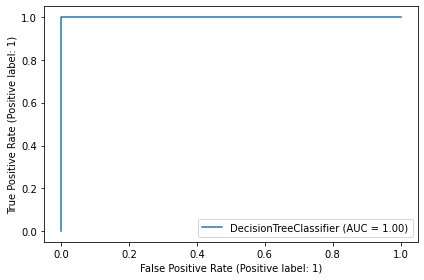

In [32]:
"""plot ROC curve for the model applied to the training set"""

plot_roc_curve(dtc, X_train, y_train)
plt.tight_layout()
plt.show()

/Users/benkarabinus/.local/share/virtualenvs/COMP4448-zVXvr8KM/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


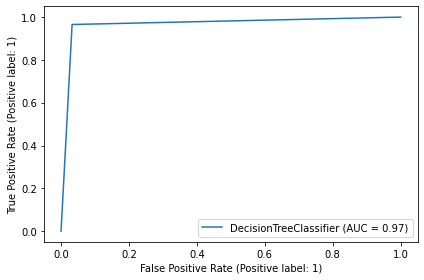

In [33]:
"""plot ROC curve for the model applied to the test set"""

plot_roc_curve(dtc, X_test, y_test)
plt.tight_layout()
plt.show()

### h)	Plot the confusion matrix using plot_confusion_matrix

/Users/benkarabinus/.local/share/virtualenvs/COMP4448-zVXvr8KM/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


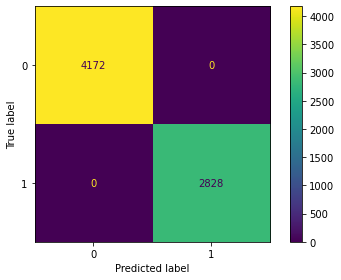

In [37]:
"""plot the confusion matrix for the model applied to the training set"""

plot_confusion_matrix(dtc, X_train, y_train)
plt.tight_layout()
plt.show()

/Users/benkarabinus/.local/share/virtualenvs/COMP4448-zVXvr8KM/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


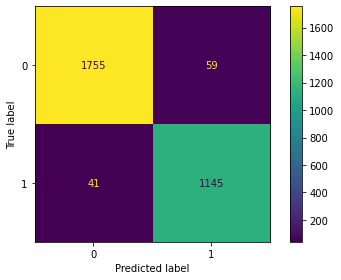

In [38]:
"""plot the confusion matrix for the model applied to the test set"""

plot_confusion_matrix(dtc, X_test, y_test)
plt.tight_layout()
plt.show()